# MULTIPLE LINEAR REGRESSION

### Build and train a multiple linear regression model to predict sales revenue

### About the dataset

This is from an advertising industry, it comprises data from various media channels, including TV, radio, and newspapers, correlated with overall sales. Each record in the dataset reflects the expenditure in these channels for a given market and the resulting sales figures. This dataset is typically used to build regression models to predict sales based on advertising spend across different media. The goal is to understand how different types of advertising contribute to sales, enabling marketers to optimize their ad spend for maximum revenue. This type of analysis helps in allocating marketing budgets more efficiently by quantifying the impact of each advertising medium on sales.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
df = pd.read_csv('advertising.csv')

In [4]:
# Calling on the dataset
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
# Calling on the first five data points
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# Displaying the df information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# Checking the statistical summary of the entire dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Checking the correlation metrics
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
# Checking the number of rows and columns present in the dataset
df.shape

(200, 4)

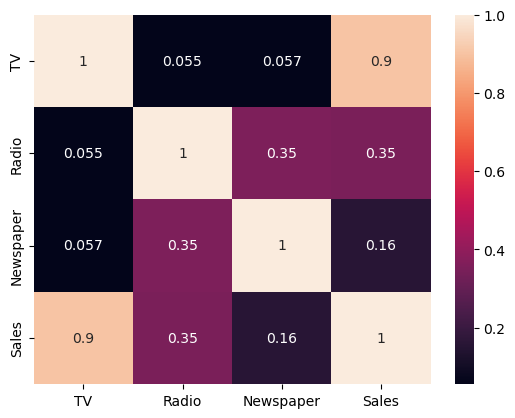

In [10]:
# Using heatmap to visualize correlation
sns.heatmap(df.corr(), annot = True);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


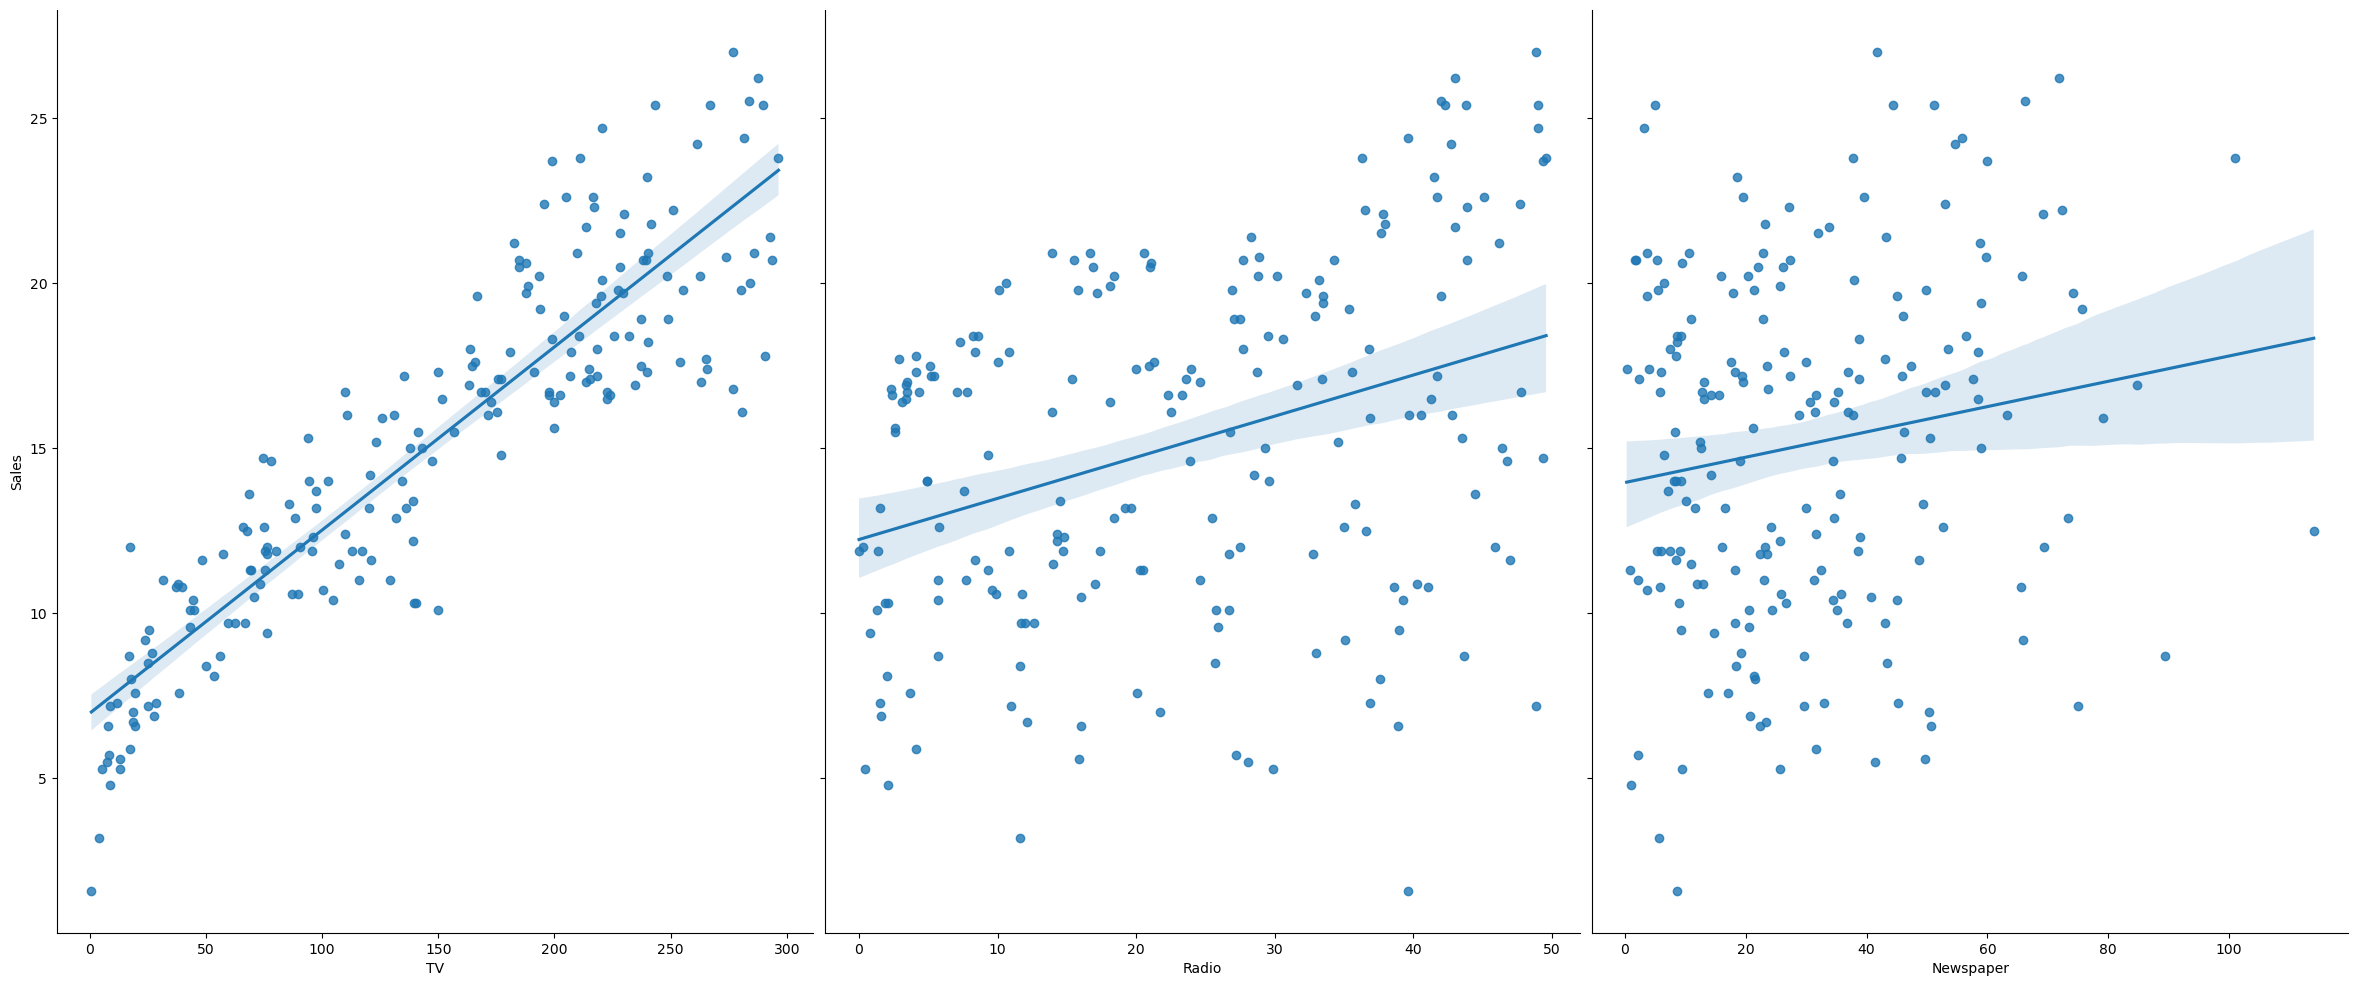

In [11]:
# Regression plot for TV, Radio and Newspaper vs Sales
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'],
            y_vars = ['Sales'], height = 10, aspect = .8, kind = 'reg')

In [46]:
#  X = Independent varaibles, y = dependent varible
X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales
print(X)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [13]:
print(X.shape)
print(y.shape)

(200, 3)
(200,)


# Working on the entire dataset without splitting it into training and test sets

In [14]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

linreg1 = LinearRegression()
linreg1.fit(X[['TV', 'Newspaper']], y)

LinearRegression()

In [15]:
linreg1_pred = linreg1.predict(X[['TV', 'Newspaper']])
linreg1_pred

array([20.71183349,  9.85985517,  8.98559455, 16.10326332, 17.71482296,
        8.66564471, 10.01397251, 13.15851311,  6.73454718, 17.79355051,
       10.50596882, 18.16683491,  9.26072115, 11.79345646, 18.6757735 ,
       18.37603125, 12.93635085, 23.18930624, 10.52322379, 14.84663603,
       19.65613144, 19.92481569,  8.25260829, 19.49374695, 10.14309695,
       21.2255464 , 14.43509678, 20.05794809, 20.53723845, 11.18583395,
       23.49498051, 13.45892951, 12.37021862, 20.87467954, 11.69949723,
       22.47083579, 21.06859853, 11.5392116 ,  9.52251333, 19.62814419,
       18.21291904, 16.99285487, 22.45625543, 18.32000714,  8.74425412,
       16.70082771, 12.10535963, 19.93243548, 20.04985575, 10.87791196,
       18.14223815, 11.85954264, 19.18685352, 17.82179292, 21.12085095,
       18.75360161,  7.71419628, 14.17007397, 18.828904  , 18.08438529,
        9.73896405, 22.05335663, 20.12836987, 12.11115462, 14.20917469,
       10.05943212,  8.02735331, 14.17431822, 19.59954737, 18.88

In [18]:
print('R^2: ', r2_score(y, linreg1_pred))

R^2:  0.8236419280498489


In [19]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()
linreg2.fit(X[['TV', 'Radio']], y)

LinearRegression()

In [20]:
linreg2_pred = linreg2.predict(X[['TV', 'Radio']])
linreg2_pred

array([21.21078412, 11.26581887, 10.48671441, 17.30620681, 15.63273693,
       10.34542196, 11.27702065, 13.27626614,  5.32420713, 15.7884357 ,
        8.85156828, 18.89326105,  9.68859218, 10.75417988, 19.26995575,
       20.38243344, 12.24510831, 24.19693004, 10.59582626, 15.21268363,
       19.49126811, 18.10365306,  7.05368143, 18.87282745,  9.37344932,
       19.32062224, 15.55185089, 19.49389028, 21.08221178, 10.18976923,
       23.61202043, 12.64300467, 10.0840803 , 21.23601486,  9.99168941,
       20.89860809, 23.85755331, 13.99264065,  9.83919073, 21.08572385,
       18.04678695, 17.8479762 , 23.58582996, 16.79663584,  8.75193486,
       16.57632034, 10.5759795 , 22.14092985, 18.69504157,  9.52745742,
       15.84202299, 11.12643101, 20.88281419, 19.52472489, 22.0212491 ,
       20.75520158,  8.03996233, 14.10457969, 21.42457912, 19.26492534,
        7.75824801, 23.4347471 , 19.32172162, 13.39515504, 16.35620987,
        9.38458127,  8.98251618, 13.76965098, 20.50436345, 21.14

In [21]:
print('R^2: ', r2_score(y, linreg2_pred))

R^2:  0.9025896186081139


In [22]:
linreg3 = LinearRegression()
linreg3.fit(X[['TV', 'Radio', 'Newspaper']], y)

LinearRegression()

In [23]:
linreg3_pred = linreg3.predict(X[['TV', 'Radio', 'Newspaper']])
linreg3_pred

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [24]:
print('R^2: ', r2_score(y, linreg3_pred))

R^2:  0.9025912899684558


# Training and Predicting
### Now splitting the dataset into traning and test set for groups of features. while the column 'Sales' remains the dependent variable

##### For Tv, Radio and Newspaper as features

In [25]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [27]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [28]:
linreg4 = LinearRegression()
linreg4.fit(X_train, y_train)

LinearRegression()

In [29]:
# Calculating the average difference between the actual and the predicted values
print(linreg4.coef_)
print(linreg4.intercept_)

[ 0.05502392  0.10251003 -0.00150711]
4.661439720130815


In [30]:
linreg4_pred = linreg4.predict(X_test)
linreg4_pred

array([21.28816103, 18.04213212, 10.0595901 , 21.08224067, 20.76476044,
       24.47187353, 16.80643646, 15.62885738, 10.12479884, 18.84601896,
       15.78389695, 10.54297035, 18.92928707, 15.52557996, 17.8412711 ,
       15.24120343, 13.74212833, 21.0643733 , 10.05392699, 19.26500889,
       11.16451173, 11.97211832,  8.61179009, 11.98972141, 12.59914023,
       16.8447954 ,  9.7170889 , 21.09489946, 18.13942474, 19.55008709,
       22.08796224, 17.78527998, 16.53883452, 14.77303861, 21.39458945,
       16.95491635, 17.22755002, 12.31866943, 21.04982199,  7.77473926,
        5.38467516,  9.63139004,  6.89549204, 19.19507436,  7.88125192,
       15.18766673, 13.70978421, 21.0232936 , 20.5350058 , 20.48867548,
       24.86087902, 14.96304281,  7.33545571, 19.35630325, 21.32554066,
       14.7719757 , 17.19642519,  7.11988693, 18.30096543,  9.65158222])

In [31]:
from sklearn import metrics
# Calculating the average difference between the actual and the predicted values
print(np.sqrt(metrics.mean_squared_error(y_test, linreg4_pred)))

1.5396947656031235


This suggests that linreg4 prediction is 1.54 away from the actual values, approximately.

In [32]:
# Checking the models fittness
print('R^2: ', r2_score(y_test, linreg4_pred))

R^2:  0.9071151423684273


This explains that 90% of the variance in the target variable is expalined by the model

##### For Tv and Radio as features

In [33]:
X = df[['TV', 'Radio']]
y = df.Sales

In [34]:
# Assigning the training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 1)

In [35]:
linreg5 = LinearRegression()
linreg5.fit(X_train, y_train)

LinearRegression()

In [36]:
# Checking the coeffient and intercept
print(linreg5.coef_)
print(linreg5.intercept_)

[0.05500479 0.10164376]
4.639008926907952


In [37]:
linreg5_pred = linreg5.predict(X_test)
linreg5_pred

array([21.27554871, 18.04413436, 10.04526843, 21.07795257, 20.76423625,
       24.50740473, 16.83323361, 15.68162724, 10.14864711, 18.88583302,
       15.81165115, 10.52903732, 18.88798717, 15.53710632, 17.89256894,
       15.30376549, 13.7533847 , 21.04564029, 10.01123808, 19.22700869,
       11.13726975, 12.08849512,  8.6318737 , 11.9695358 , 12.61765092,
       16.84166307,  9.72360365, 21.0787461 , 18.08284546, 19.54310936,
       22.0528736 , 17.88322056, 16.49174353, 14.79364521, 21.37183984,
       16.9439132 , 17.21766262, 12.33599795, 21.02620801,  7.76014232,
        5.40022916,  9.64193492,  6.89748794, 19.20956586,  7.89673349,
       15.17050006, 13.69731125, 21.01207034, 20.49912402, 20.54570123,
       24.87342707, 14.9269724 ,  7.33240195, 19.3788249 , 21.28115586,
       14.76423945, 17.20643146,  7.13220997, 18.27975661,  9.63678816])

In [38]:
# Calculating the average difference between the actual and the predicted values
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, linreg5_pred)))

# Checking the models fittness
print('R^2: ', r2_score(y_test, linreg5_pred))

RMSE:  1.5376953350310443
R^2:  0.9073562242286407


This suggests that the predictions made by `linreg5` deviate from the actual values by approximately 1.53 units on average. Additionally, the model explains about 90% of the variance in the target variable, indicating a strong fit and that most of the variability in the target data is captured by the model.

##### For Tv and Newspaper as features

In [40]:
X = df[['TV', 'Newspaper']]
y = df.Sales

In [41]:
# Assigning the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [42]:
linreg6 = LinearRegression()
linreg6.fit(X_train, y_train)

LinearRegression()

In [43]:
# Checking the coeffient and intercept
print(linreg6.coef_)
print(linreg6.intercept_)

[0.05520081 0.02804232]
6.127486057967861


In [44]:
linreg6_pred = linreg6.predict(X_test)
linreg6_pred

array([18.8210113 , 18.19178646, 11.61771629, 22.19485734, 20.97872005,
       23.63883607, 16.62521634, 17.74546319, 11.16878961, 19.6329772 ,
       16.53722454, 10.46055626, 18.09126822, 13.62990978, 20.17621902,
       15.28717911, 14.36769642, 22.41271985,  7.80142026, 18.0190893 ,
       11.77059925, 13.06692527,  8.72725878, 12.36171384, 13.44209056,
       17.24520118,  9.49092624, 20.50361554, 15.43593272, 20.02336854,
       19.88894216, 21.45006371, 14.55930052, 16.50975281, 20.40862519,
       16.951046  , 18.77149954, 14.1481949 , 18.85777176,  7.6861413 ,
        7.56850003, 11.7682207 ,  7.81593143, 18.68391717,  7.69140403,
       14.794173  , 11.41164911, 19.61062392, 17.99328062, 20.87681108,
       23.55492617, 13.27042996,  7.82372544, 17.85323734, 20.79723261,
       15.76228425, 18.95722159,  8.34036313, 19.18356114,  9.07598827])

In [45]:
# Calculating the average difference between the actual and the predicted values
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, linreg6_pred)))

# Checking the models fittness
print('R^2: ', r2_score(y_test, linreg6_pred))

RMSE:  2.220264447419659
R^2:  0.8068542916996702


This suggests that the predictions made by `linreg6` deviate from the actual values by approximately 2.22 units on average. Additionally, the model explains about 80% of the variance in the target variable, indicating a strong fit and that most of the variability in the target data is captured by the model.